<a href="https://colab.research.google.com/github/errasti13/flowINN/blob/master/jupyterNotebooks/LidDrivenCavity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/errasti13/flowINN.git

Cloning into 'flowINN'...
remote: Enumerating objects: 693, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 693 (delta 0), reused 0 (delta 0), pack-reused 688 (from 1)
Receiving objects: 100% (693/693), 124.09 KiB | 4.28 MiB/s, done.
Resolving deltas: 100% (414/414), done.


In [2]:
%cd flowINN

/content/flowINN


In [3]:
pip install . -q

  Preparing metadata (setup.py) ... done


In [4]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 20)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 40)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 60)                  │           2,460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 40)                  │           2,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,683 (26.11 KB)

 Trainable params: 6,683 (26.11 KB)

 Non-trainable params: 0 (0.00 B)

Generating mesh...


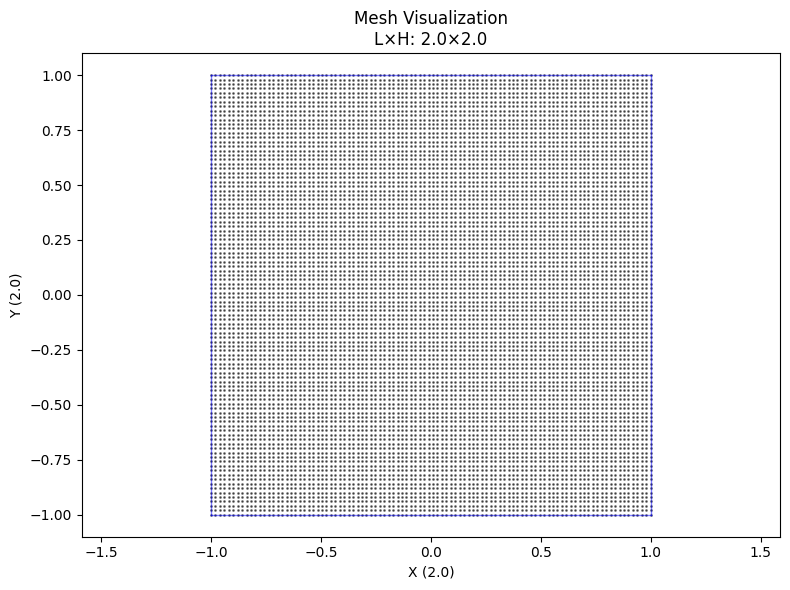

Starting training...
Epoch 100: Loss = 0.021293820813298225
Epoch 200: Loss = 0.01692652702331543
Epoch 300: Loss = 0.01765606179833412
Epoch 400: Loss = 0.016236204653978348
Epoch 500: Loss = 0.016794294118881226
Epoch 600: Loss = 0.018107935786247253
Epoch 700: Loss = 0.01619604602456093
Epoch 800: Loss = 0.015527298673987389
Epoch 900: Loss = 0.015322428196668625
Epoch 1000: Loss = 0.014851524494588375
Epoch 1100: Loss = 0.015232366509735584
Epoch 1200: Loss = 0.013883184641599655
Epoch 1300: Loss = 0.014133124612271786
Epoch 1400: Loss = 0.013295789249241352
Epoch 1500: Loss = 0.01242151204496622
Epoch 1600: Loss = 0.012100817635655403
Epoch 1700: Loss = 0.011943326331675053
Epoch 1800: Loss = 0.012189258821308613
Epoch 1900: Loss = 0.01210863422602415
Epoch 2000: Loss = 0.011303634382784367
Epoch 2100: Loss = 0.011637954972684383
Epoch 2200: Loss = 0.011620240285992622
Epoch 2300: Loss = 0.01250971108675003
Epoch 2400: Loss = 0.011273890733718872
Epoch 2500: Loss = 0.0109949186444

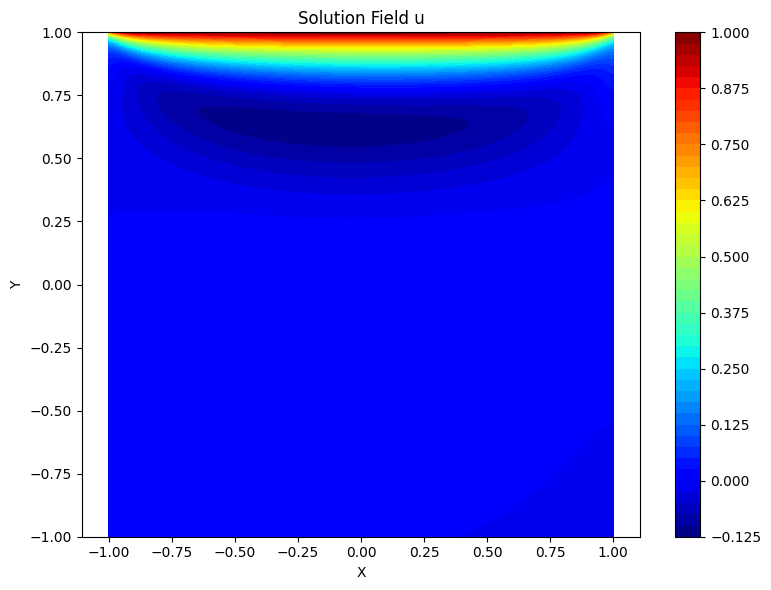

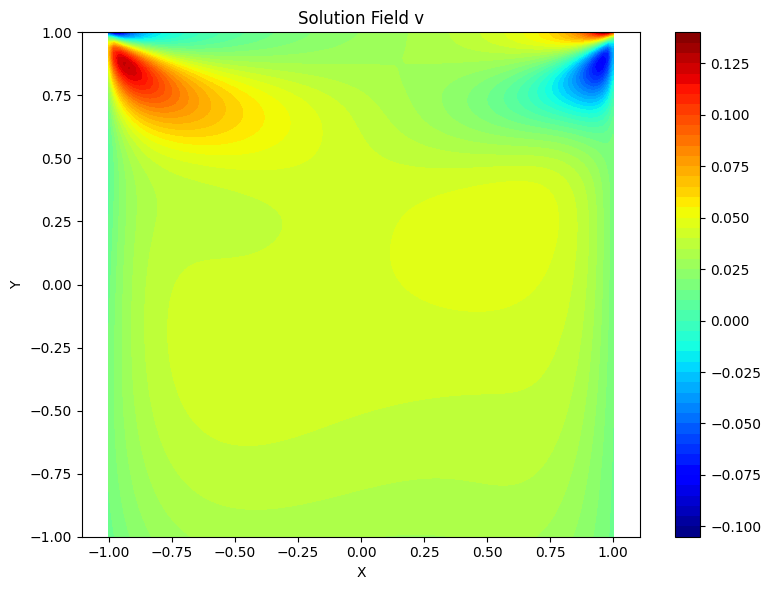

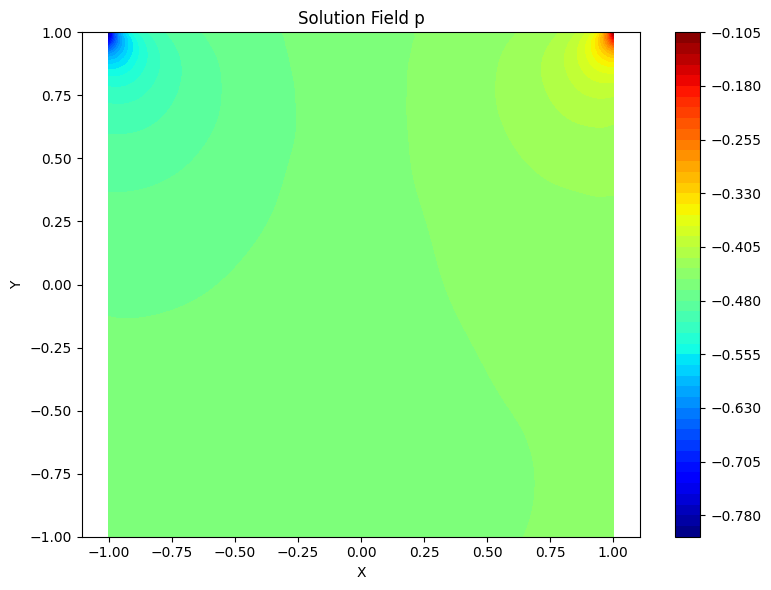

Simulation completed successfully!


In [ ]:
from flowinn.tests.LidDrivenCavity import LidDrivenCavity

def main():
    # Domain setup
    x_range = (-1, 1)
    y_range = (-1, 1)

    # Simulation parameters
    case_name = "LidDrivenCavity"
    epochs = 10000
    print_interval = 100
    autosave_interval = 100

    # Mesh parameters
    nx = 100
    ny = 100
    n_boundary = 100

    trainedModel = False

    try:
        # Initialize simulation
        cavity = LidDrivenCavity(case_name, x_range, y_range)

        # Generate mesh
        print("Generating mesh...")
        cavity.generateMesh(Nx=nx, Ny=ny, NBoundary=n_boundary, sampling_method='uniform')
        cavity.mesh.showMesh()

        # Train or load model
        if trainedModel:
            print("Loading pre-trained model...")
            cavity.load_model()
        else:
            print("Starting training...")
            cavity.train(epochs=epochs,
                        print_interval=print_interval,
                        autosaveInterval=autosave_interval)

        # Predict and visualize
        print("Predicting flow field...")
        cavity.predict()

        # Plot results
        print("Generating plots...")
        cavity.plot(solkey='u')
        cavity.plot(solkey='v')
        cavity.plot(solkey='p')

        print("Simulation completed successfully!")

    except Exception as e:
        print(f"Error during simulation: {str(e)}")
        raise

if __name__ == "__main__":
    main()